<a href="https://colab.research.google.com/github/amirmohammadkalateh/optimizers_ANN/blob/main/AdaGrad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

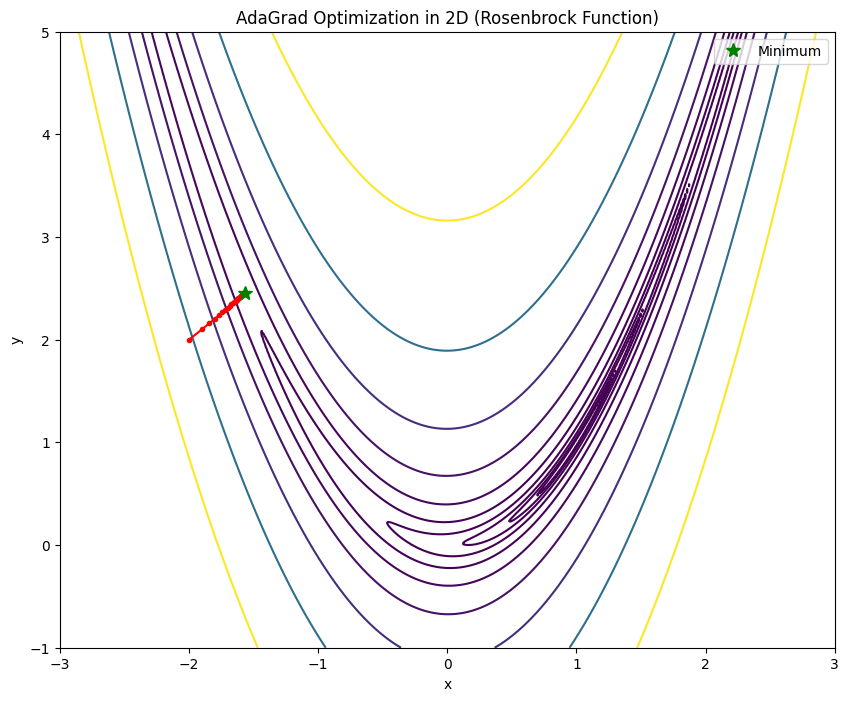

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def adagrad_2d(func, grad_func, x_init, learning_rate=0.1, num_iterations=50):
    x = np.array(x_init, dtype=float)
    x_history = [x.copy()]
    grad_squared_sum = 0

    for _ in range(num_iterations):
        grad = np.array(grad_func(x))
        grad_squared_sum += grad**2
        x -= learning_rate * grad / (np.sqrt(grad_squared_sum) + 1e-8)
        x_history.append(x.copy())

    return np.array(x_history)


def rosenbrock(x):
    return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2

def rosenbrock_grad(x):
    return np.array([-400 * x[0] * (x[1] - x[0]**2) - 2 * (1 - x[0]), 200 * (x[1] - x[0]**2)])


x_init = [-2, 2]
learning_rate = 0.1


x_history = adagrad_2d(rosenbrock, rosenbrock_grad, x_init, learning_rate)


x_vals = np.linspace(-3, 3, 400)
y_vals = np.linspace(-1, 5, 400)
X, Y = np.meshgrid(x_vals, y_vals)
Z = rosenbrock([X, Y])

plt.figure(figsize=(10, 8))
plt.contour(X, Y, Z, levels=np.logspace(-1, 3, 10), cmap='viridis')
plt.plot(x_history[:, 0], x_history[:, 1], 'r-o', markersize=3)
plt.plot(x_history[-1, 0], x_history[-1, 1], 'g*', markersize=10, label='Minimum')
plt.xlabel('x')
plt.ylabel('y')
plt.title('AdaGrad Optimization in 2D (Rosenbrock Function)')
plt.legend()
plt.show()

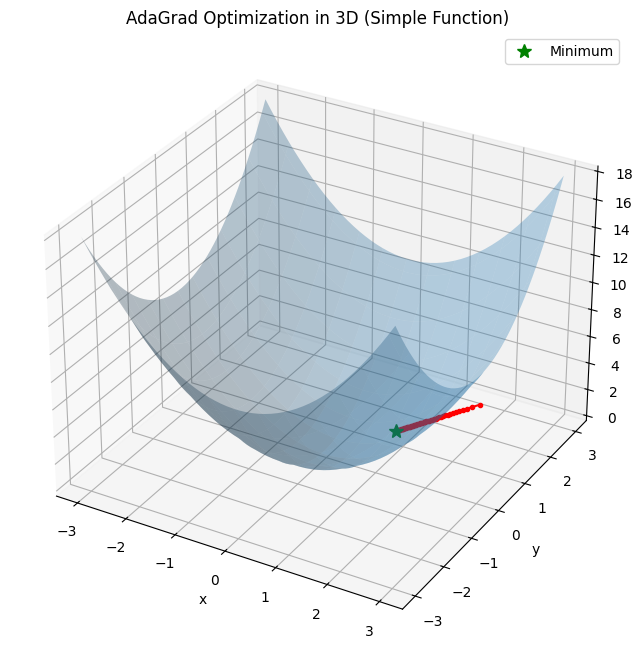

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def adagrad_3d(func, grad_func, x_init, learning_rate=0.1, num_iterations=50):
    x = np.array(x_init, dtype=float)
    x_history = [x.copy()]
    grad_squared_sum = 0

    for _ in range(num_iterations):
        grad = np.array(grad_func(x))
        grad_squared_sum += grad**2
        x -= learning_rate * grad / (np.sqrt(grad_squared_sum) + 1e-8)
        x_history.append(x.copy())

    return np.array(x_history)


def simple_3d_func(x):
    return x[0]**2 + x[1]**2 + x[2]**2

def simple_3d_grad(x):
    return np.array([2 * x[0], 2 * x[1], 2 * x[2]])


x_init = [2, 2, 2]
learning_rate = 0.1


x_history = adagrad_3d(simple_3d_func, simple_3d_grad, x_init, learning_rate)


x_vals = np.linspace(-3, 3, 50)
y_vals = np.linspace(-3, 3, 50)
X, Y = np.meshgrid(x_vals, y_vals)
Z_fixed = 0
Z = simple_3d_func([X, Y, Z_fixed])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, rstride=4, cstride=4, alpha=0.3)
ax.plot(x_history[:, 0], x_history[:, 1], x_history[:, 2], 'r-o', markersize=3)
ax.plot(x_history[-1, 0], x_history[-1, 1], x_history[-1, 2], 'g*', markersize=10, label='Minimum')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('AdaGrad Optimization in 3D (Simple Function)')
plt.legend()
plt.show()